# Dataset

In [86]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [87]:
df =pd.read_csv("train.csv", na_values =['?',''],delimiter =',', delim_whitespace =False)
data_aux=df

# Exploring Dataset

possible correlation b/w the dependent and independent variables.
linear regression models are sensitive to non-linearity ,outliers and colinearity

Text(0.5, 1.0, 'Figure 1- The correlation matrix between all the features')

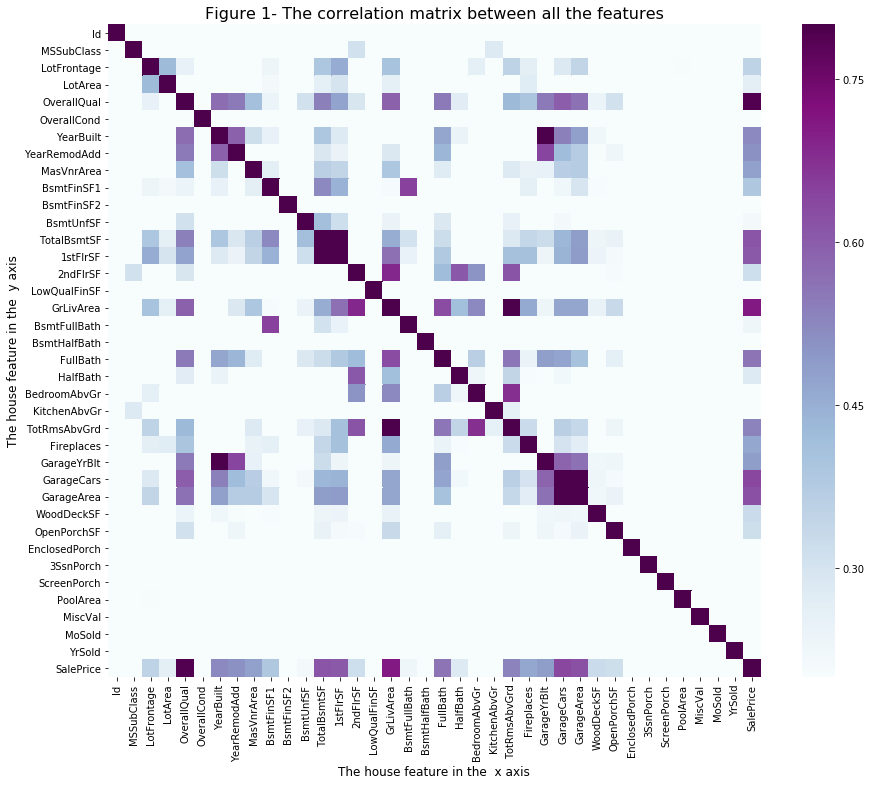

In [88]:
#correlation matrix 
correlation_matrice = data_aux.corr()
f,ax =plt.subplots(figsize=(15,12))
sns.heatmap(correlation_matrice, vmin =0.2,vmax=0.8, square =True, cmap='BuPu')
plt.xlabel('The house feature in the  x axis' ,fontsize =12)
plt.ylabel('The house feature in the  y axis', fontsize =12)
plt.title('Figure 1- The correlation matrix between all the features', fontsize =16)

some of the features are strongly correlated with salesprice viz: overallqual, totalbsmtsf,1stflrsf,grlivarea, garagecars and gragarea.


some are strongly correalted  to each other(multicollinearity) viz: garageyrblt and  yearbuilt hence can be considered as same variable.

correlation matrix just show the correlation and not the nature of it unlike scatter plot

# Scatter plot of the most correlated feature with salesprice

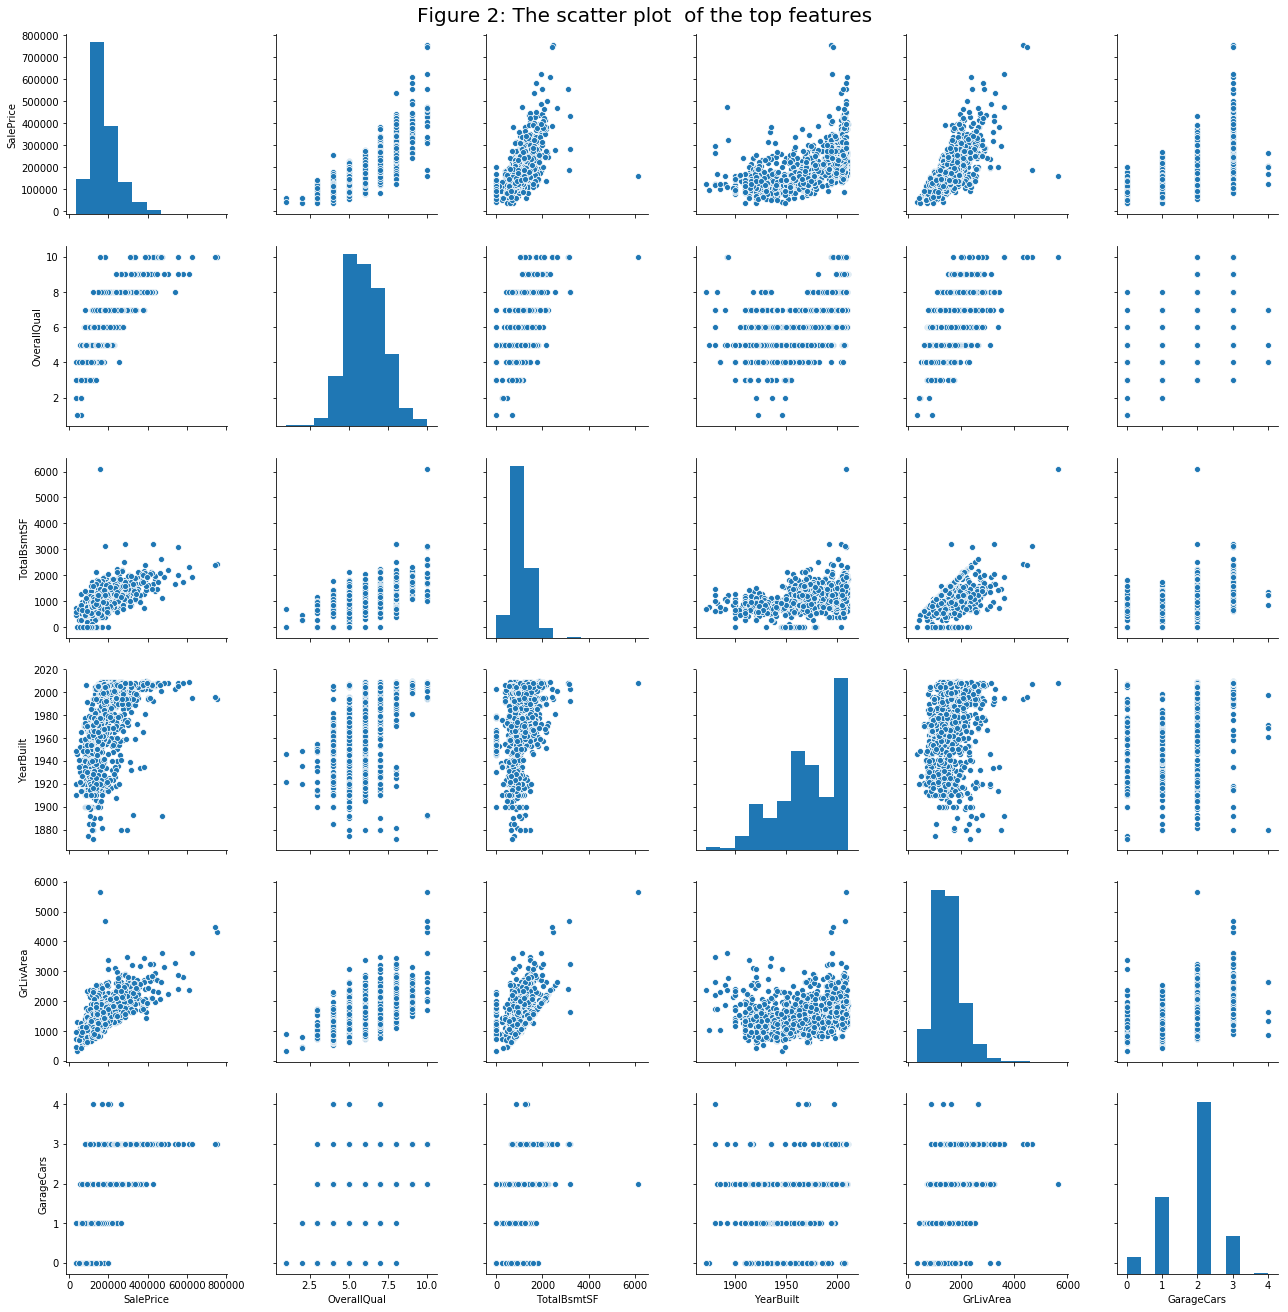

In [89]:
cols = ['SalePrice','OverallQual', 'TotalBsmtSF','YearBuilt','GrLivArea','GarageCars']
sns.pairplot(df[cols],size=3)
plt.suptitle('Figure 2: The scatter plot  of the top features', x=0.5,y=1.01, verticalalignment ='top', fontsize =20)
plt.tight_layout()
plt.show()

from fiure 2 its is seen that TotalBamtSF and GrLivArea exhibit same kind of outliers , so now we have to take a closer look at them and check for outliers

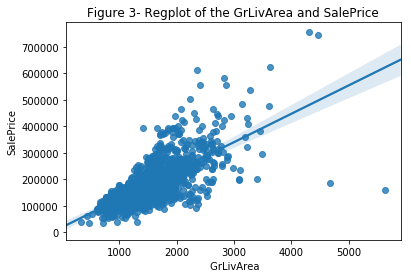

In [90]:
#regplot of GrLivArea/SalePrice
ax= sns.regplot(x=data_aux['GrLivArea'], y=data_aux['SalePrice'])
plt.ylabel('SalePrice',fontsize =10)
plt.xlabel(' GrLivArea',fontsize =10)
plt.title('Figure 3- Regplot of the GrLivArea and SalePrice',fontsize =12)
plt.show()

So it can be seen that there are 2 outliers, at these points the ground living area is large but the sales price is low (illogical), so now we remove the outliers

In [91]:
#removing outliers
#we sort values acc to GrLivArea and select the 2 larger values and  we locate the index no. to use for  dropping ouliers
g_out =data_aux.sort_values(by ='GrLivArea', ascending =False).head(2)
g_out

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260,Unf,0,878,3138,GasA,Ex,Y,SBrkr,3138,1538,0,4676,1,0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,2007.0,Fin,3,884,TA,TA,Y,208,406,0,0,0,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [92]:
data_aux.drop([523,1298],inplace =True)
data_aux.reset_index(inplace= True)

Next drawing regplot for TotalBsmtSF/SalePrice

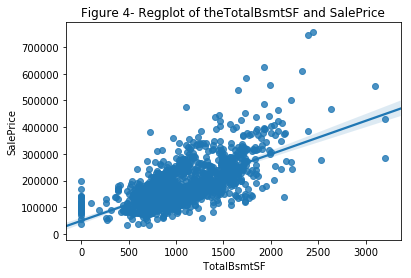

In [93]:
#regplot for TotalBsmtSF/SalePrice
ax= sns.regplot(x=data_aux['TotalBsmtSF'], y=data_aux['SalePrice'])
plt.ylabel('SalePrice',fontsize =10)
plt.xlabel(' TotalBsmtSF',fontsize =10)
plt.title('Figure 4- Regplot of theTotalBsmtSF and SalePrice',fontsize =12)
plt.show()

Generally speaking there are no obvious outliers so no rows need to be deleted

# Missing values

So data can have missing or blank values . Here we have some 'NA' , to solve this in this project we will replace 'NA' by 'NO'

In [94]:
print("Shape of training set:", df.shape)
print("Missing values before remove NA:")
print(data_aux.columns[data_aux.isnull().any()])

Shape of training set: (1458, 82)
Missing values before remove NA:
Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')


Now replacing "NA" with "NO" whereever appropriate

In [95]:
#Alley
data_aux.Alley.fillna(inplace =True, value='No')
#BsmtQual
data_aux.BsmtQual.fillna(inplace =True, value='No')
#BsmtCond
data_aux.BsmtCond.fillna(inplace =True, value='No')
#BsmtExposure
data_aux.BsmtExposure.fillna(inplace =True, value='No')
#BsmtFinType1
data_aux.BsmtFinType1.fillna(inplace =True, value='No')
#BsmtFinType2
data_aux.BsmtFinType2.fillna(inplace =True, value='No')
#FireplaceQu
data_aux.FireplaceQu.fillna(inplace =True, value='No')
#GarageType
data_aux.GarageType.fillna(inplace =True, value='No')
#GarageFinish
data_aux.GarageFinish.fillna(inplace =True, value='No')
#GarageQual
data_aux.GarageQual.fillna(inplace =True, value='No')
#GarageCond
data_aux.GarageCond.fillna(inplace =True, value='No')
#PoolQC
data_aux.PoolQC.fillna(inplace =True, value='No')
#Fence
data_aux.Fence.fillna(inplace =True, value='No')
#MiscFeature
data_aux.MiscFeature.fillna(inplace =True, value='No')

print("Missing values after being replaced with No:")
print(data_aux.columns[data_aux.isnull().any()])

Missing values after being replaced with No:
Index(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'Electrical', 'GarageYrBlt'], dtype='object')


For numeric features replace the missing value with 0
(missing value means that the house doesnot have that feature)

In [96]:
#numeric fields
data_aux.BsmtFinSF1.fillna(inplace =True, value=0)
data_aux.BsmtFinSF2.fillna(inplace =True, value=0)
data_aux.BsmtUnfSF.fillna(inplace =True, value=0)
data_aux.TotalBsmtSF.fillna(inplace =True, value=0)
data_aux.BsmtFullBath.fillna(inplace =True, value=0)
data_aux.BsmtHalfBath.fillna(inplace =True, value=0)
data_aux.GarageCars.fillna(inplace =True, value=0)
data_aux.GarageArea.fillna(inplace =True, value=0)
data_aux.LotFrontage.fillna(inplace =True, value=0)
data_aux.GarageYrBlt.fillna(inplace =True, value=0)
data_aux.MasVnrArea.fillna(inplace =True, value=0)


for some data there is nothing mentioned as "NA" so in this case this categorical feature is replace it with MODE.

In [97]:
#KirchenQual
data_aux.KitchenQual= data_aux.KitchenQual.mode()[0]
#Functional
data_aux.Functional= data_aux.Functional.mode()[0]
#Utilities
data_aux.Utilities = data_aux.Utilities.mode()[0]  
#SaleType
data_aux.SaleType  = data_aux.SaleType.mode()[0]
#Exterior1st
data_aux.Exterior1st = data_aux.Exterior1st.mode()[0]
#Exterior2nd
data_aux.Exterior2nd = data_aux.Exterior2nd.mode()[0] 
#Electrical  
data_aux.Electrical = df['Electrical'].mode()[0]
#MSZoning    
data_aux.MSZoning = data_aux.MSZoning.mode()[0]
#MasVnrType - remove the records where the value is NA 
data_aux.MasVnrType=df['MasVnrType'].mode()[0]

print("After we imputed the missing values , the status of dataset is:")
print(data_aux.columns[data_aux.isnull().any()])

After we imputed the missing values , the status of dataset is:
Index([], dtype='object')


Now there is no missing or curropted value

# Encoding

Encoding is to deal with different types of values: ordinal,numeric, nominal. (i.e. if one column has different enteries)

For encoding the steps are:
* Mapping the ordinal fields which are strings to the corresponding code
* Converting numeric categorical feature to string.
* Applying one-hot encoding

In [98]:
#mapping ordinal features
#LotShape: General shape of property
lotshape_map = {'Reg':'8','IR1':'6','IR2':'4','IR3':'2'}
data_aux.LotShape = data_aux.LotShape.map(lotshape_map)
data_aux.LotShape = data_aux.LotShape.astype('int64')

#Utilities: Type of utilities available       
utilities_map = {'AllPub':'8','NoSewr':'6','NoSeWa':'4','ELO':'2'}
data_aux.Utilities = data_aux.Utilities.map(utilities_map)
data_aux.Utilities = data_aux.Utilities.astype('int64')
    
#LandSlope: Slope of property
landslope_map = {'Gtl':'6','Mod':'4','Sev':'2'}
data_aux.LandSlope = data_aux.LandSlope.map(landslope_map)
data_aux.LandSlope = data_aux.LandSlope.astype('int64')
#ExterQual: Evaluates the quality of the material on the exterior 
quality_map = {'Ex':'10','Gd':'8','TA':'6','Fa':'4','Po':'2','No':'0'}
data_aux.ExterQual = data_aux.ExterQual.map(quality_map)
data_aux.ExterQual = data_aux.ExterQual.astype('int64')

#ExterCond: Evaluates the present condition of the material on the exterior
data_aux.ExterCond = data_aux.ExterCond.map(quality_map)
data_aux.ExterCond = data_aux.ExterCond.astype('int64')

#BsmtQual: Evaluates the height of the basement
data_aux.BsmtQual = data_aux.BsmtQual.map(quality_map)
data_aux.BsmtQual = data_aux.BsmtQual.astype('int64')

#BsmtCond: Evaluates the general condition of the basement
data_aux.BsmtCond = data_aux.BsmtCond.map(quality_map)
data_aux.BsmtCond = data_aux.BsmtCond.astype('int64')

#HeatingQC: Heating quality and condition
data_aux.HeatingQC = data_aux.HeatingQC.map(quality_map)
data_aux.HeatingQC = data_aux.HeatingQC.astype('int64')
        
#KitchenQual: Kitchen quality
data_aux.KitchenQual = data_aux.KitchenQual.map(quality_map)
data_aux.KitchenQual = data_aux.KitchenQual.astype('int64')

#FireplaceQu: Fireplace quality
data_aux.FireplaceQu = data_aux.FireplaceQu.map(quality_map)
data_aux.FireplaceQu = data_aux.FireplaceQu.astype('int64')

#GarageFinish: Interior finish of the garage
garage_map = {'Fin':'6', 'RFn':'4', 'Unf':'2', 'No':'0'}    
data_aux.GarageFinish = data_aux.GarageFinish.map(garage_map)
data_aux.GarageFinish = data_aux.GarageFinish.astype('int64')

#GarageQual: Garage quality
data_aux.GarageQual = data_aux.GarageQual.map(quality_map)
data_aux.GarageQual = data_aux.GarageQual.astype('int64')

#GarageCond: Garage condition
data_aux.GarageCond = data_aux.GarageCond.map(quality_map)
data_aux.GarageCond = data_aux.GarageCond.astype('int64')

#PoolQC: Pool quality
data_aux.PoolQC = data_aux.PoolQC.map(quality_map)
data_aux.PoolQC = data_aux.PoolQC.astype('int64')


In [99]:
#converting numeric to nominal before applying one code encoding 
#after converting to string thet will be treated categorically

#MSSubClass as str
data_aux['MSSubClass'] = data_aux['MSSubClass'].astype("str")
#Year and month to catrgorical
data_aux['YrSold'] =data_aux['YrSold'].astype("str")
data_aux['MoSold'] =data_aux['MoSold'].astype("str")


In [100]:
#converting from str to int of ordinal fields
data_aux.OverallCond =data_aux.OverallCond.astype("int64")
data_aux.OverallQual =data_aux.OverallQual.astype("int64")
data_aux['KitchenAbvGr'] = data_aux['KitchenAbvGr'].astype("int64")

In [101]:
#at last applying one hot encoding

data_train =pd.get_dummies(data_aux)
print("New shape after one-hot encoding:", np.shape(data_train))

New shape after one-hot encoding: (1458, 229)


Now we have new dataset with no missing value and well defined set of features and as expected after encoding the features went from 81 to 229

## Transfering non-linear data to linear data

checking whether the data is linear or non-linear, by using Multiple Regression model and plotting residuals against predicted values.

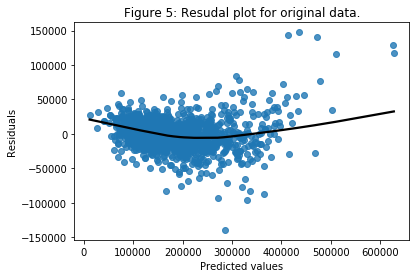

Mean Square Error: 487191610.9722927


In [102]:
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import statsmodels.api as sm

x_train =data_train.drop('SalePrice',axis=1)
y_train =data_train['SalePrice']

scaler = preprocessing.StandardScaler()
x_train_s= scaler.fit_transform(x_train)

linear1 =LinearRegression()
linear1.fit(x_train_s, y_train)
pred =linear1.predict(x_train_s)
ax=sns.regplot(x=pred, y=y_train-pred, lowess=True,line_kws={'color':"black"})
ax.set_title("Figure 5: Resudal plot for original data.")
ax.set_xlabel("Predicted values")
ax.set_ylabel("Residuals")
plt.show()
print("Mean Square Error:", sum(np.power((y_train-pred),2))/x_train.shape[0])

#results= sm.OLS(y_train,x_train_S).fit()
#print(results.summary())

Since we got some trace f non-linearity and the MSE is quite high , applying log transformation on dependent variable SalePrice.

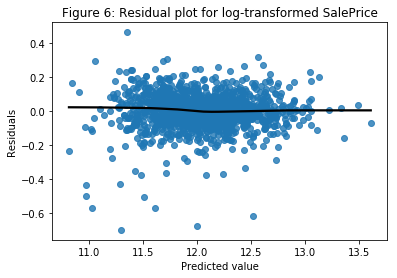

Mean Square Error: 0.010075089452128897


In [103]:
#log transformation
linear2= LinearRegression()
linear2 .fit(x_train_s, np.log1p(y_train))
pred =linear2.predict(x_train_s)
ax= sns.regplot(x=pred, y=np.log1p(y_train)-pred, lowess=True, line_kws={"color":"black"})
ax.set_title("Figure 6: Residual plot for log-transformed SalePrice")
ax.set_xlabel("Predicted value")
ax.set_ylabel("Residuals")
plt.show()
print("Mean Square Error:", sum(np.power((np.log1p(y_train)-pred),2))/x_train.shape[0])

data_train['SalePrice'] =np.log1p(data_train.SalePrice)

The fitted line by using log transformation is much better and the  MSE also declined  beautifully.

## Enginnering New Features

Since there is no 1 feature to get the TotalSF of the house but it can be obtained from intergrating other features like - TotalBsmtSF, 1stFlrSF, 2ndFlrSF and GarageArea. 

In [104]:
data_train['TotalSF'] =data_train['TotalBsmtSF']+data_train['1stFlrSF']+data_train['2ndFlrSF']

## Feature Selection

In feature selection we select the least no. of features which are highly correlated with the dependent variable, it can help in getting  a better fit and this much better performance and  interpertbility.
We use an automatic FS technique of tree based learning technique and hence select best FS from the algo.

In [105]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from tabulate import tabulate

#tree based FS
y_train =(data_train['SalePrice'])
x_train= (data_train.drop('SalePrice', axis=1))

#clf =ExtraTreesREgressor(random_state=0, n_estimators =1400)
clf = RandomForestRegressor(n_estimators=1400, criterion='mse',max_depth=None,min_samples_split=2, min_samples_leaf=1,min_weight_fraction_leaf=0.0,
                            max_features='auto',
                           max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False
                           ,n_jobs = 1, random_state=0, verbose=0,warm_start=False)
clf= clf.fit(x_train,y_train)

#organizing the feature selected for visualization
pd.set_option('display.max_columns',None) #to print all the columns of the data frame
data= np.zeros((1,x_train.shape[1]))
data=pd.DataFrame(data,columns=x_train.columns)
data.iloc[0]=clf.feature_importances_
data= data.T.sort_values(data.index[0],ascending=False).T
print("Ten most important features selected with tree based selection: \n")
print(tabulate(data.iloc[:,0:5], headers='keys', tablefmt='psql'))
print(tabulate(data.iloc[:,6:11],headers='keys',tablefmt='psql'))

#select the feature based on threshold
model= SelectFromModel(clf,prefit=True,threshold=1e-3)
#Reduce data to the selected features
aux=model.transform(x_train)

print("/n New shape for train after tree based feature selection: {}".format(aux.shape))
data_train_less_features_aux =pd.DataFrame(aux)
data_train_less_features_aux.columns= [data.columns[i] for i in range(0,aux.shape[1])]
print("\n Feature Selected:")
print(data_train_less_features_aux.columns)
data_train_less_features= pd.concat([data_train_less_features_aux,pd.DataFrame(y_train)],axis=1)

print("\n End of the process of selected best features. \n")

Ten most important features selected with tree based selection: 

+----+---------------+-----------+-------------+--------------+-------------+
|    |   OverallQual |   TotalSF |   GrLivArea |   GarageCars |   YearBuilt |
|----+---------------+-----------+-------------+--------------+-------------|
|  0 |      0.447933 |  0.318475 |   0.0142033 |    0.0122076 |   0.0116482 |
+----+---------------+-----------+-------------+--------------+-------------+
+----+-----------+--------------+--------------+---------------+----------------+
|    |   LotArea |   GarageArea |   BsmtFinSF1 |   OverallCond |   CentralAir_N |
|----+-----------+--------------+--------------+---------------+----------------|
|  0 | 0.0114447 |    0.0110259 |    0.0106029 |     0.0103856 |      0.0102372 |
+----+-----------+--------------+--------------+---------------+----------------+
/n New shape for train after tree based feature selection: (1458, 41)

 Feature Selected:
Index(['OverallQual', 'TotalSF', 'GrLivArea'

The final process resulted in 40 features.  It is important to note that the field we created before TotalSF was chosen as one of the most relevant feature.

## Feature Scaling

Our last step in the pre-processing phase would be standardizing the data. We use cross validation so the scaling has to be done independently for  training and testing data

## Regression Models

Here we have all the different  scikit-;earn modeling algos.
We aim to measure the performance of each model and compare it with the other models

In [106]:
#packages
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn.model_selection import train_test_split

#python dictionary to collect the result
RMSE_results ={
    'Linear Regression': 0.0,
    'Lasso':0.0,
    'Ridge': 0.0,
    'ElasticNet': 0.0,
    'SVM':0.0,
    'NN':0.0,
    'RF': 0.0
    }

## Linear Regression

Different LR methods are discussed.

## Ordinary Least Squares

Least Square Error is a common way to the measure of the performance of LR model. It work in the way that minimizes the sum of square b/w the true value and the predicted value.
It solves problem of the form:   𝑚𝑖𝑛𝑤||𝑋𝑤−𝑦||^2  and can be solved analyticaly by the equation

𝛽̂ =(𝑋^𝑇 *𝑋)^−1𝑋𝑇𝑦
 
Where X is a matrix of the independents features, y is the actual response and  𝛽̂   the estimated weights w.

In [107]:
from sklearn.linear_model import LinearRegression, SGDRegressor, RidgeCV, Lasso, LassoCV, ElasticNetCV
from sklearn import preprocessing


x_train = data_train_less_features.drop('SalePrice',axis=1).values
y_train = data_train_less_features['SalePrice'].values



print("Linear Regression \n")

#Cross validation
classifierLinearRegression = LinearRegression(fit_intercept=True, normalize=False,
                                              copy_X=True, n_jobs=1)
kf = KFold(5, random_state=7, shuffle=True)    
cv_y = []
cv_pred = []
fold = 0
pred = []

for training, test in kf.split(x_train):
    fold+=1    
    pred = []    
    
    scaler = preprocessing.StandardScaler(copy=True, with_mean=True, with_std=True)
    x_train_fold = scaler.fit_transform(x_train[training,:])
    x_test_fold = scaler.transform(x_train[test])

    y_train_fold = y_train[training]    
    y_test_fold = y_train[test]
    
    classifierLinearRegression = classifierLinearRegression.fit(x_train_fold, y_train_fold)
    pred = classifierLinearRegression.predict(x_test_fold)
    cv_y.append(y_test_fold)
    cv_pred.append(pred)        

    
#Calculating the error.
cv_y = np.concatenate(cv_y)
cv_pred = np.concatenate(cv_pred)
score = np.sqrt(metrics.mean_squared_error(cv_y,cv_pred))
print("\n Average RMSE: {}".format(score))    
RMSE_results['LinearRegression'] = score

Linear Regression 


 Average RMSE: 0.1267384579716497


## Ridge Regression

Ridge mainly focus on decresing the size  of the coefficent it solves the problem of Ordinary MSE. 
The new equation of a penalized residual sum of square is  𝑚𝑖𝑛𝑤||𝑋𝑤−𝑦||^2+𝛼||𝑤||^2 


𝛼≥0  is called the regularization parameter (L2) and controls the amount of shrinkage. Higher the values of alpha, bigger is the penalty and therefore the magnitude of coefficients are reduced. It is worth to note that we used RidgeCV which does an implicit leave-one-out cross-validation to choose the best alpha.



In [108]:
print("Ridge")
classifier =RidgeCV(alphas=(0.1,1.0,10.0),fit_intercept =True
                   ,normalize =False, scoring=None, cv=None, 
                   gcv_mode=None, store_cv_values=False)
kf= KFold(5,random_state=7,shuffle=True)
cv_y=[]
cv_pred=[]
fold=0
pred=[]

for  training , test in kf.split(x_train):
    fold+=1
    pred=[]
    scaler=preprocessing.StandardScaler()
    x_train_fold = scaler.fit_transform(x_train[training])
    x_test_fold= scaler.transform(x_train[test])
    
    y_train_fold=y_train[training]
    y_test_fold= y_train[test]
    
    classifier.fit(x_train_fold, y_train_fold)
    pred=classifier.predict(x_test_fold)
    cv_y.append(y_test_fold)
    cv_pred.append(pred)
    
cv_y =np.concatenate(cv_y)
cv_pred=np.concatenate(cv_pred)
score=np.sqrt(metrics.mean_squared_error(cv_y,cv_pred))
print("average RMSE:{}".format(score))
RMSE_results['Ridge']= score

Ridge
average RMSE:0.12638992606343558


## Lasso

Its similar to ridge  only difference is instead of adding  sq  of theta, we add absolute value of w:
          𝑚𝑖𝑛𝑤 1/2𝑛||𝑋𝑤−𝑦||^2+𝛼||𝑤|
Lasso is  a linear model and determine the  sparse coefficents i.e. it reduce the no. of variables upon which the given solution is dependent. It does a kind of feature  selection and lead to a less complex final model. 
For eg, if we have correlated features it  will choose one and set the coeffiecent of the other to zero. The regularization parameter alpha(L1) controls the degree of sparsity of the coefffients estimated.

In [112]:
print("Lasso /n")
classifier= LassoCV(eps=0.001,n_alphas=100,alphas=None,fit_intercept=True,
                normalize=False,precompute='auto',max_iter=1000,tol=0.0001,
                  copy_X=True, cv=None,verbose=False,n_jobs=1, positive=False,
                  random_state=None, selection='cyclic')
kf=KFold(5,random_state=7,shuffle=True)
cv_y=[]
cv_pred=[]
fold=0
pred=[]

for training , test in kf.split(x_train):
    fold +=1
    pred=[]
    
    scaler=preprocessing.StandardScaler()
    x_train_fold=scaler.fit_transform(x_train[training])
    x_test_fold =scaler.transform(x_train[test])
    
    y_train_fold=y_train[training]
    y_test_fold=y_train[test]
    
    classifier.fit(x_train_fold,y_train_fold)
    pred=classifier.predict(x_test_fold)
    cv_y.append(y_test_fold)
    cv_pred.append(pred)
    
cv_y =np.concatenate(cv_y)
cv_pred= np.concatenate(cv_pred)
score=np.sqrt(metrics.mean_squared_error(cv_y,cv_pred))
print("Average RMSE:{}".format(score))
RMSE_results['Lasso']=score

Lasso /n
Average RMSE:0.12617960211685822


## ElasticNet

Its hybrid of L1 and L2 regularization.This allows learning a sparse model where few of the weights are non-zeri like Lasso, while still maintaining the regularized property of Ridge. It is useful when there are correlated features.Lasso is likely to pick one of them at random, while ElasticNet will pick both of the features. 
    𝑚𝑖𝑛𝑤 1/2𝑛𝑠𝑎𝑚𝑝𝑙𝑒𝑠||𝑋𝑤−𝑦||2^+𝛼𝜌||𝑤||1+𝛼(1−𝜌)/2||𝑤||^2


In [121]:
print("ElasticNet /n")

classifier = ElasticNetCV(l1_ratio=0.5,eps=0.001,n_alphas=100,alphas=None,
                       fit_intercept=True, normalize=False,precompute='auto',
                       max_iter=1000, tol=0.0001,cv=None,copy_X=True,verbose=0,
                       n_jobs=1, positive=False,random_state=None,selection='cyclic')
kf=KFold(5, random_state=7,shuffle=True)
cv_y=[]
cv_pred=[]
fold=0
pred=[]

for training,test in kf.split(x_train):
    fold +=1
    pred=[]
    scaler = preprocessing.StandardScaler()
    x_train_fold=scaler.fit_transform(x_train[training])
    x_test_fold=scaler.transform(x_train[test])
    
    y_train_fold= y_train[training]
    y_test_fold= y_train[test]
    
    classifier.fit(x_train_fold, y_train_fold)
    pred= classifier.predict(x_test_fold)
    cv_y.append(y_test_fold)
    cv_pred.append(pred)
cv_y= np.concatenate(cv_y)
cv_pred=np.concatenate(cv_pred)
score =np.sqrt(metrics.mean_squared_error(cv_y,cv_pred))
print("Average RMSE:{}".format(score))
RMSE_results["ElasticNet"]= score

ElasticNet /n
Average RMSE:0.1261645867191034


## Comparing Different Regression

All the methods have fairly similar performance. OLS and Ridge have comparitively less RMSE. In conclusion regularization is not a big issue for the particular problem.

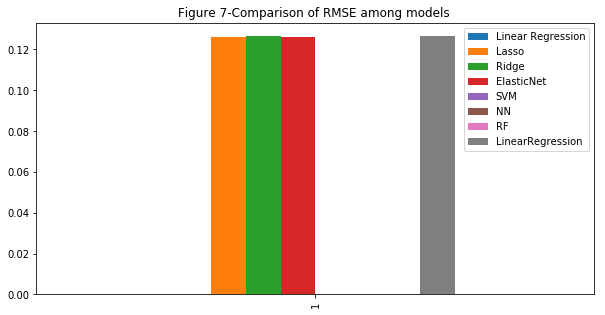

In [125]:
fig_1 =pd.DataFrame(RMSE_results, index=(1,))
ax=fig_1.plot(kind='bar',figsize=(10,5),title='Figure 7-Comparison of RMSE among models ')
ax.set_ylabel =("Root MeanSQaure Error")
ax.set_xlabel=("Models")

## Support Vector Machine 

SVM is a large margin classifier. Its main advantage is that it is low generalization error. whereas models with large margin are  more prone to overfitting. 
The width of the margin can be controlled by using regularization parameter C. 
lower value of C give smaller margins and vice-versa.


From above results we can conclude that no regularization was actually needed. The best value  of  C was !. we kept other parameters in there default value

In [126]:
from sklearn.svm import SVR
print("SVM /n")

classifierSVR= SVR(kernel='linear', degree=3, gamma='auto',
                   coef0=0.0,tol=0.001,C=1.0,epsilon=0.1,shrinking=True
                   , cache_size=200,verbose=False, max_iter=-1)
kf=KFold(5,random_state=7,shuffle=True)
cv_y=[]
cv_pred=[]
fold=0
pred= []

for training, test in kf.split(x_train):
    fold +=1
    pred=0
    scaler=preprocessing.StandardScaler()
    x_train_fold= scaler.fit_transform(x_train[training])
    x_test_fold=scaler.transform(x_train[test])
    
    y_train_fold = (y_train[training])
    y_test_fold=(y_train[test])
    
    classifierSVR = classifierSVR.fit(x_train_fold,y_train_fold)
    pred= classifierSVR.predict(x_test_fold)
    cv_y.append(y_test_fold)
    cv_pred.append(pred)
cv_y=np.concatenate(cv_y)
cv_pred=np.concatenate(cv_pred)
score= np.sqrt(metrics.mean_squared_error(cv_y,cv_pred))
print("Average Error:{}".format(score))
RMSE_results['SVM']=score

SVM /n
Average Error:0.12752067494068864


## Random Forest

Random forest is a versatile and precise classifier. It does not need scaled and can deal with any no. of features. In order to test RF we train it with different train sets. First with data containing all the features and no scaling. Second in reduced train set with scaled features.


In [138]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor

print("/n Random Forest")

print("/n Full Features")
y_train_rf= data_train['SalePrice'].values
x_train_rf= data_train.drop("SalePrice",axis=1).values

classifierAllFeatures= RandomForestRegressor(n_estimators=500, criterion='mse',
                                            max_depth=None, min_samples_split=2, min_samples_leaf=1,
                                            min_weight_fraction_leaf=0.0,max_features='auto',max_leaf_nodes=None,
                                            min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True,
                                            oob_score=False,  n_jobs=1, random_state=0,verbose=0,warm_start=False)
kf=KFold(5,random_state=7,shuffle=True)
cv_y=[]
cv_pred=[]
fold=0
pred=[]
for training,test in kf.split(x_train):
    fold+=1
    pred=[]
    x_train_fold=x_train_rf[training]
    x_test_fold=x_train_rf[test]
    y_train_fold=y_train_rf[training]
    y_test_fold=y_train_rf[test]
    
    classifierAllFeatures.fit(x_train_fold,y_train_fold)
    pred= classifierAllFeatures.predict(x_test_fold)
    cv_y.append(y_test_fold)
    cv_pred.append(pred)
cv_y= np.concatenate(cv_y)
cv_pred =np.concatenate(cv_pred)
score=  np.sqrt(metrics.mean_squared_error(cv_y,cv_pred))
print("Average Error using all features:{}".format(score))

print("/nLess Features /n")
kf= KFold(5, random_state=7,shuffle=True)
cv_y=[]
cv_pred=[]
fold=0
pred=[]

classifierRF_lessFeatures= RandomForestRegressor(n_estimators=500,criterion='mse',
                                                min_weight_fraction_leaf=0.0,max_features='auto', max_leaf_nodes=None,
                                                min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True,
                                                oob_score=False, n_jobs=1, random_state=0,verbose=0,warm_start=False)
for training, test in kf.split(x_train):
    fold+=1
    pred=[]
    
    scaler= preprocessing.StandardScaler()
    x_train_fold=scaler.fit_transform(x_train[training])
    x_test_fold= scaler.transform(x_train[test])
    
    y_train_fold= y_train[training]
    y_test_fold= y_train[test]
    
    classifierRF_lessFeatures.fit(x_train_fold, y_train_fold)
    pred= classifierRF_lessFeatures.predict(x_test_fold)
    cv_y.append(y_test_fold)
    cv_pred.append(pred)

cv_y=np.concatenate(cv_y)
cv_pred=np.concatenate(cv_pred)
score =np.sqrt(metrics.mean_squared_error(cv_y,cv_pred))
print("Average Error less features:{}".format(score))
RMSE_results["RF"]=score

/n Random Forest
/n Full Features
Average Error using all features:0.1362547539022083
/nLess Features /n
Average Error less features:0.1363968486990473


As seen from the results above, seems that the restircted set is better in performance as compared to the full set.

The configurations we used were: no_of_trees=500 asany greater value didn't enhance the accuracy. MSE: as quality metrix to measure split, max_depth= none i.e. nodes are expanded until all leaves are pure or until all leaves contain less that min_sample_split sample_max_features=auto to consider alll the features when looking for the best split and bootstrap= True for replacement as it gave better results during the tests.
All other parameters were maintained in their  default values.

## Compare the performance of all models

Text(0.5, 0, 'Models')

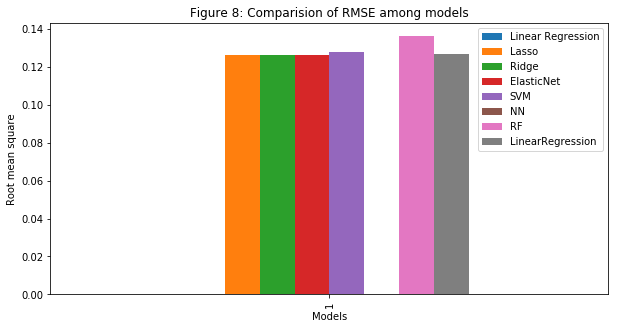

In [141]:
fig_1= pd.DataFrame(RMSE_results,index=(1,))
ax= fig_1.plot(kind='bar',figsize=(10,5),title="Figure 8: Comparision of RMSE among models")
ax.set_ylabel("Root mean square")
ax.set_xlabel('Models')

## Conclusion

Most of the models have similar performance, though Rf has a little more RMS error as compared to others. 
Data preprocessing (log transformation and removing outliers) improved the performance dramatically. Encoding the features to their type :nominal,ordinal, numerical also played a crucial role.
Filling out missing data gave a smooth dataset.
Ways to improve our results is :
1. creating an ordinal version of the location , as loc is an important factor in most housing prices.
2. Applying more feature engineering to our model as we applied for TotalSF
3. Doing more log transformation to other variables to reduce their variability.
